In [ ]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import random

In [ ]:
# read file function
def read_dic(mypath:str)-> list:
    onlyfiles = [mypath + '/'+f for f in listdir(mypath) if isfile(join(mypath, f)) and f != ".DS_Store"]
    return onlyfiles

In [ ]:
folder = read_dic('/Users/alex/Documents/GitHub/Visual-Similarity/Data/7_Maurer_inprep_followup')
image_Labels = []
for file in folder:
    # load the image
    image = Image.open(file)
    # convert image to numpy array
    data = asarray(image)
    data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    # set thresholds to adjust ink
    for m in range(data.shape[0]):
        for n in range(data.shape[1]):
            if data[m][n] > 127.5:
                data[m][n] = 255
            else:
                data[m][n] = 0
    num_labels, labels = cv2.connectedComponents(data)
    image_Labels.append(labels)
    

In [ ]:
# np.savetxt("/Users/alex/Desktop/data.csv", data, delimiter=",")

In [ ]:
# list all i and j in dictionary according to labels
dic = {}
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if labels[i][j] in dic.keys():
            dic[labels[i][j]].append((i,j))
        else:
            dic[labels[i][j]] = []
            dic[labels[i][j]].append((i,j))

In [ ]:
# define function find min&max i&j in dictionary for each key
def find_min_max_ij(dic):   
    i_s =[]
    j_s =[]
    for tup in dic:
        i_s.append(tup[0])
        j_s.append(tup[1])
    i_min,i_max = min(i_s),max(i_s)
    j_min,j_max = min(j_s),max(j_s)
    return i_min,i_max,j_min,j_max

In [ ]:
# make a dic for i&j min&max
dic_min_max= {}
for obj in dic.keys():
    i_min,i_max,j_min,j_max = find_min_max_ij(dic[obj])
    dic_min_max[obj] = [i_min,i_max,j_min,j_max]

In [ ]:
dic_min_max


In [ ]:
print(i_min)

In [ ]:
# define contain function
def contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
    if i_min1<i_min2 and j_min1<j_min2 and i_max1>i_max2 and j_max1>j_max2:
        return True # label 1 contains label 2
    else:
        return False

In [ ]:
# find where the 0s are in original data -> 8 in 'labels'
for key in dic.keys():
    for k in range(len(dic[key])):
        if data[dic[key][k]] == 255:
            labels[dic[key][k]] = 8

In [ ]:
# generate pairwise list of labels
pair_list = []
for t in range(0,len([*dic])):
	for p in range(0,len([*dic])):
		if (t!=p):
			pair_list.append(([*dic][t],[*dic][p]))


In [ ]:
# contain function -> if some components are contained by the other, change them to the same
for pair in pair_list:
    key1 = pair[0]
    key2 = pair[1]
    if contain(dic_min_max[key1][0], dic_min_max[key1][1], dic_min_max[key1][2], dic_min_max[key1][3],
    dic_min_max[key2][0], dic_min_max[key2][1], dic_min_max[key2][2], dic_min_max[key2][3]) == True:
        for kk in range(len(dic[key1])):
            labels[dic[key1][kk]] = labels[dic[key1][kk]]

In [ ]:
plt.imshow(labels)
print(labels[52])

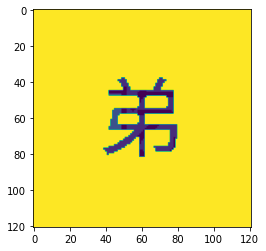

In [1]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import random

# read file function
def read_dic(mypath:str)-> list:
    onlyfiles = [mypath + '/'+f for f in listdir(mypath) if isfile(join(mypath, f)) and f != ".DS_Store"]
    return onlyfiles

folder = read_dic('/Users/alex/Documents/GitHub/Visual-Similarity/Data/7_Maurer_inprep_followup')
image_Labels = []
for file in folder:
    # load the image
    image = Image.open(file)
    # convert image to numpy array
    data = asarray(image)
    data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    # set thresholds to adjust ink
    for m in range(data.shape[0]):
        for n in range(data.shape[1]):
            if data[m][n] > 127.5:
                data[m][n] = 255
            else:
                data[m][n] = 0
    num_labels, labels = cv2.connectedComponents(data)
    image_Labels.append(labels)

for labels in image_Labels:
    # list all i and j in dictionary according to labels
    dic = {}
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            if labels[i][j] in dic.keys():
                dic[labels[i][j]].append((i,j))
            else:
                dic[labels[i][j]] = []
                dic[labels[i][j]].append((i,j))

    # define function find min&max i&j in dictionary for each key
    def find_min_max_ij(dic):   
        i_s =[]
        j_s =[]
        for tup in dic:
            i_s.append(tup[0])
            j_s.append(tup[1])
        i_min,i_max = min(i_s),max(i_s)
        j_min,j_max = min(j_s),max(j_s)
        return i_min,i_max,j_min,j_max

    # make a dic for i&j min&max
    dic_min_max= {}
    for obj in dic.keys():
        i_min,i_max,j_min,j_max = find_min_max_ij(dic[obj])
        dic_min_max[obj] = [i_min,i_max,j_min,j_max]

    # define contain function
    def contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
        if i_min1<i_min2 and j_min1<j_min2 and i_max1>i_max2 and j_max1>j_max2:
            return True # label 1 contains label 2
        else:
            return False

    # find where the 0s are in original data -> 8 in 'labels'
    for key in dic.keys():
        for k in range(len(dic[key])):
            if data[dic[key][k]] == 255:
                labels[dic[key][k]] = 8

    # generate pairwise list of labels
    pair_list = []
    for t in range(0,len([*dic])):
        for p in range(0,len([*dic])):
            if (t!=p):
                pair_list.append(([*dic][t],[*dic][p]))

    # contain function -> if some components are contained by the other, change them to the same
    for pair in pair_list:
        key1 = pair[0]
        key2 = pair[1]
        if contain(dic_min_max[key1][0], dic_min_max[key1][1], dic_min_max[key1][2], dic_min_max[key1][3],
        dic_min_max[key2][0], dic_min_max[key2][1], dic_min_max[key2][2], dic_min_max[key2][3]) == True:
            for kk in range(len(dic[key1])):
                labels[dic[key1][kk]] = labels[dic[key1][kk]]


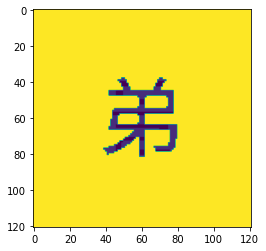

In [8]:
plt.imshow(image_Labels[3])
